In [ ]:
# distribution of length of texts by article
# distribution of length of texts in all

# no. of cases per article
# no. of documents per article


# distribution of cases by year


In [1]:
# Data visualization
import matplotlib.pyplot as plt 

# Data manipulation
import pandas as pd
import numpy as np
import csv
from zipfile import ZipFile

In [2]:
# Webscraping
import glob
import requests
from bs4 import BeautifulSoup
import time
import datetime
from pandas.core.common import flatten
import os
from itertools import chain
from tqdm import tqdm
import json
import urllib.request

In [3]:
# Parsing and pre-processing
from glob import glob
import os 
import re

from pdfminer.high_level import extract_text
import pdfplumber
from langdetect import detect, DetectorFactory

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from string import punctuation
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [6]:
df = pd.read_json(r"../../../data/processed/df_eng_clean_filtered_2023_03_09.json")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10959 entries, 0 to 14096
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         10942 non-null  float64
 1   len_pdf      10959 non-null  int64  
 2   article_new  10959 non-null  object 
 3   case_num     10959 non-null  object 
 4   file         10959 non-null  object 
 5   sec_text     10959 non-null  object 
 6   count        10959 non-null  int64  
 7   lang         10959 non-null  object 
 8   section_fin  10959 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 856.2+ KB


In [36]:
# no of cases by article_new
df.groupby('article_new')['case_num'].nunique().sort_index()

article_new
article6(1)(b)    1284
article6(2)        203
article8(1)         30
article8(2)         59
article8(3)          9
referral            59
simplified        3213
Name: case_num, dtype: int64

In [37]:
# no of documents by article_new
df.groupby('article_new')['file'].nunique().sort_index()

article_new
article6(1)(b)    1286
article6(2)        205
article8(1)         30
article8(2)         60
article8(3)          9
referral            92
simplified        3213
Name: file, dtype: int64

In [38]:
# no of rows by article
df['article_new'].value_counts().sort_index()

article6(1)(b)    5913
article6(2)        968
article8(1)        162
article8(2)        384
article8(3)         63
referral           256
simplified        3213
Name: article_new, dtype: int64

In [39]:
# no of cases by year
df.groupby('year')['case_num'].nunique()

year
2004.0    100
2005.0    231
2006.0    278
2007.0    302
2008.0    243
2009.0    178
2010.0    203
2011.0    255
2012.0    175
2013.0    199
2014.0    232
2015.0    261
2016.0    303
2017.0    263
2018.0    336
2019.0    318
2020.0    305
2021.0    338
2022.0    287
2023.0      6
Name: case_num, dtype: int64

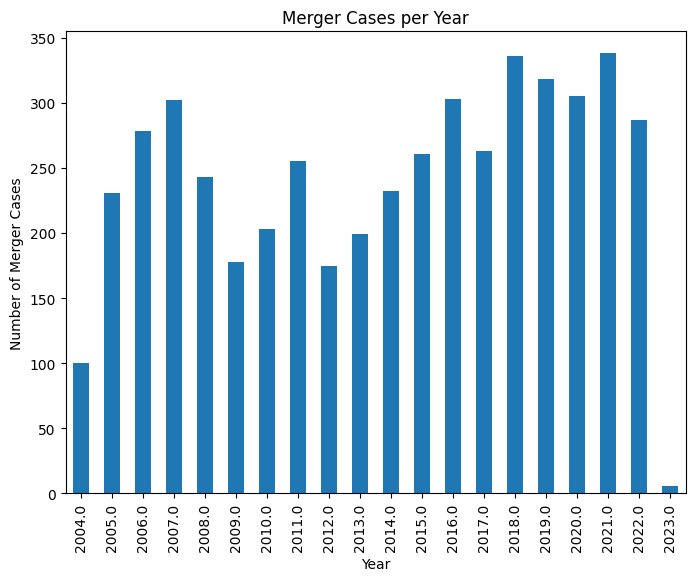

In [50]:
import matplotlib.pyplot as plt

# Group the DataFrame by year_text and count the number of unique case_num values
grouped = df.groupby('year')['case_num'].nunique()

# Create a bar chart of the grouped data
ax = grouped.plot(kind='bar', figsize=(8,6))

# Set the chart title and axis labels
ax.set_title('Merger Cases per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Merger Cases')

# Display the chart
plt.show()

### Distribution of length of texts

<AxesSubplot: >

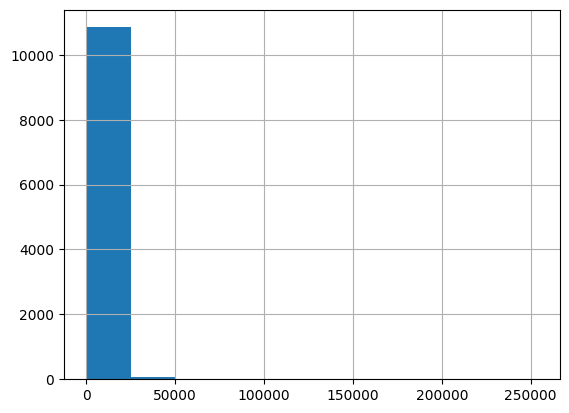

In [15]:
pd.Series(df['count']).hist(bins = 10)


Distribution without simplified and referral

<AxesSubplot: >

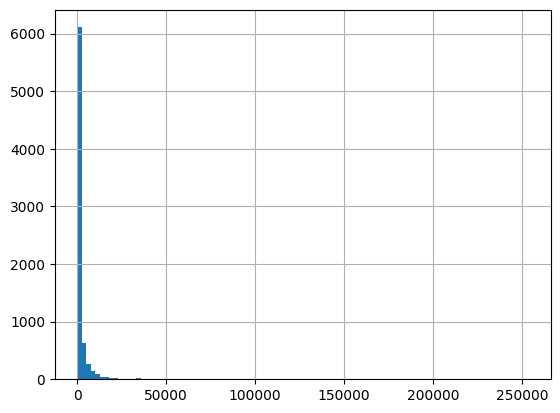

In [35]:
pd.Series(df[~df['article_new'].isin(['referral','simplified'])]['count']).hist(bins = 100)

In [33]:
len(df[~df['article_new'].isin(['referral','simplified'])]['count'])

7490

In [34]:
len(df[~df['article_new'].isin(['referral','simplified'])]['count'])/len(df.index)

0.6834565197554522

<AxesSubplot: >

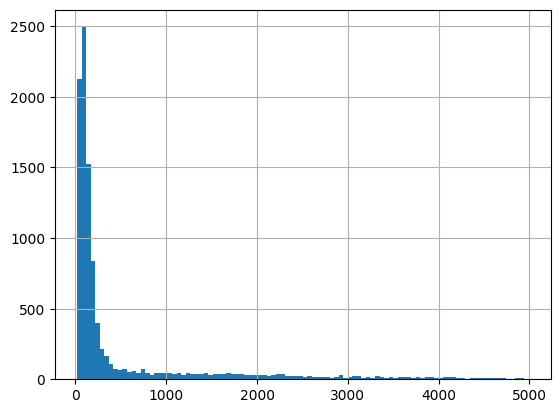

In [20]:
pd.Series(df[df['count']<5000]['count']).hist(bins = 100)

<AxesSubplot: >

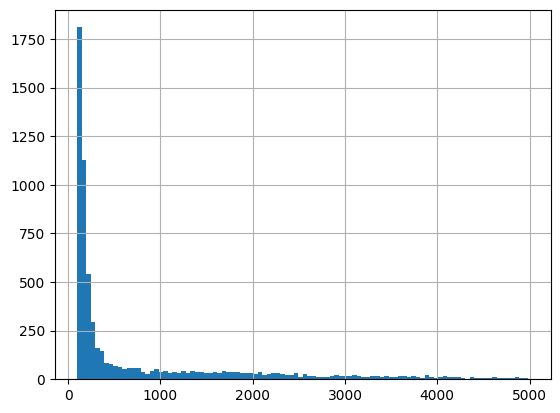

In [23]:
pd.Series(df[(df['count'] >= 100) & (df['count'] <= 5000)]['count']).hist(bins = 100)

In [26]:
len(df[(df['count'] >= 21) & (df['count'] <= 5000)])


10186

In [29]:
print(len(df[(df['count'] >= 100) & (df['count'] <= 5000)])/len(df.index))

0.5875536089059221


In [40]:
df[(df['count'] > 5000)]['sec_text']

16       5.1.  Analytical framework\n(65)  Under Articl...
41       5.1.  Analytical framework\n(40)  Article 2 of...
72       5.1.  Analytical framework\n(48)  Under Articl...
81       (52)  The  Transaction  gives  rise  to  verti...
135      5.1.  Analytical framework\n(52)  Article 2 of...
                               ...                        
14040    4.1.  Introduction\n(14)  By its Referral Requ...
14054    (14)  The Parties’ activities overlap in the s...
14062    (14)  The Parties’ activities overlap in the s...
14069    4.1.  Introduction\n(22)  By its Referral Requ...
14078    4.1.  Introduction\n(14)  By its Referral Requ...
Name: sec_text, Length: 773, dtype: object

In [46]:
min(df['count'])

21

In [47]:
max(df['count'])

253573

In [54]:
df[df['count']==max(df['count'])]

,year,len_pdf,article_new,case_num,file,sec_text,count,lang,section_fin
13831,2020.0,695,article8(2),M.9014,\m9014_8817_6,12.1. Legal Framework\n(269) A merger may si...,253573,en,Competitive Assessment
